In [3]:
import pandas as pd
data = pd.read_excel("Datasets//Banking Products Dataset.xlsx", sheet_name = "Explaining banking products")
data

,Client ID,Profit,Presentation,Age,Gender,Monthly Income
0,43,633.90,1,37,M,3905.48
1,137,380.37,0,37,M,4665.64
2,257,406.61,1,39,M,4744.88
3,477,382.20,1,36,M,3815.35
4,754,331.25,1,31,M,3916.61
...,...,...,...,...,...,...
495,99250,276.03,0,35,F,3361.19
496,99293,530.06,0,40,F,5103.11
497,99516,512.55,0,32,M,4882.56
498,99526,584.42,1,32,F,5561.87


In [5]:
# Dummy variables for Gender...
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()      # Label Encoder -> Useful for encoding binary varialbles...
data["Gender"] = encoder.fit_transform(data["Gender"])
data

,Client ID,Profit,Presentation,Age,Gender,Monthly Income
0,43,633.90,1,37,1,3905.48
1,137,380.37,0,37,1,4665.64
2,257,406.61,1,39,1,4744.88
3,477,382.20,1,36,1,3815.35
4,754,331.25,1,31,1,3916.61
...,...,...,...,...,...,...
495,99250,276.03,0,35,0,3361.19
496,99293,530.06,0,40,0,5103.11
497,99516,512.55,0,32,1,4882.56
498,99526,584.42,1,32,0,5561.87


In [6]:
x = pd.DataFrame(data[["Presentation"]])
y = pd.DataFrame(data[["Profit"]])
display(x)
display(y)

,Presentation
0,1
1,0
2,1
3,1
4,1
...,...
495,0
496,0
497,0
498,1


,Profit
0,633.90
1,380.37
2,406.61
3,382.20
4,331.25
...,...
495,276.03
496,530.06
497,512.55
498,584.42


In [8]:
# Fitting regression model 1...
import statsmodels.api as sm

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y, X_constant).fit()
temp = lin_reg.summary()
lin_reg.resid.std(ddof=x.shape[1])
display(temp)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.490
Date:                Mon, 14 Nov 2022   Prob (F-statistic):              0.223
Time:                        11:37:59   Log-Likelihood:                -3497.2
No. Observations:                 500   AIC:                             6998.
Df Residuals:                     498   BIC:                             7007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          591.1801     16.182     36.533      0.000     559.386     622.974
Presentation   -28.9320     23.705     -1.220      0.223     -75.507      17.643
==============================================================================
Omnibus:                       97.354   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.096
Skew:                           1.132   Prob(JB):                     2.59e-38
Kurtosis:                       4.783   Cond. No.                         2.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Fitting regression model 2...
x = pd.DataFrame(data[["Presentation","Age","Gender","Monthly Income"]])
y = pd.DataFrame(data[["Profit"]])

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y, X_constant).fit()
temp = lin_reg.summary()
lin_reg.resid.std(ddof=x.shape[1])
display(temp)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     139.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           9.63e-80
Time:                        11:44:34   Log-Likelihood:                -3309.3
No. Observations:                 500   AIC:                             6629.
Df Residuals:                     495   BIC:                             6650.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -171.9422     81.177     -2.118      0.035    -331.436     -12.448
Presentation     110.9260     17.395      6.377      0.000      76.748     145.103
Age                1.4441      1.957      0.738      0.461      -2.401       5.289
Gender             1.8812     16.329      0.115      0.908     -30.202      33.964
Monthly Income     0.1240      0.005     23.528      0.000       0.114       0.134
==============================================================================
Omnibus:                       63.068   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.344
Skew:                           0.715   Prob(JB):                     1.35e-28
Kurtosis:                       5.028   Cond. No.                     5.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Fitting regression model 3...
x = pd.DataFrame(data[["Presentation","Monthly Income"]])
y = pd.DataFrame(data[["Profit"]])

X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y, X_constant).fit()
temp = lin_reg.summary()
lin_reg.resid.std(ddof=x.shape[1])
display(temp)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     279.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           4.52e-82
Time:                        11:46:26   Log-Likelihood:                -3309.5
No. Observations:                 500   AIC:                             6625.
Df Residuals:                     497   BIC:                             6638.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -116.5066     32.011     -3.640      0.000    -179.400     -53.613
Presentation     110.5064     17.342      6.372      0.000      76.434     144.579
Monthly Income     0.1241      0.005     23.578      0.000       0.114       0.134
==============================================================================
Omnibus:                       62.662   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.162
Skew:                           0.715   Prob(JB):                     4.02e-28
Kurtosis:                       5.003   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

array([    0.,  3000.,  6000.,  9000., 12000., 15000.])

,Client ID,Profit,Presentation,Age,Gender,Monthly Income,bins
0,43,633.90,1,37,1,3905.48,1
1,137,380.37,0,37,1,4665.64,1
2,257,406.61,1,39,1,4744.88,1
3,477,382.20,1,36,1,3815.35,1
4,754,331.25,1,31,1,3916.61,1
...,...,...,...,...,...,...,...
495,99250,276.03,0,35,0,3361.19,1
496,99293,530.06,0,40,0,5103.11,1
497,99516,512.55,0,32,1,4882.56,1
498,99526,584.42,1,32,0,5561.87,1


(array([ 29., 336., 123.,  11.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

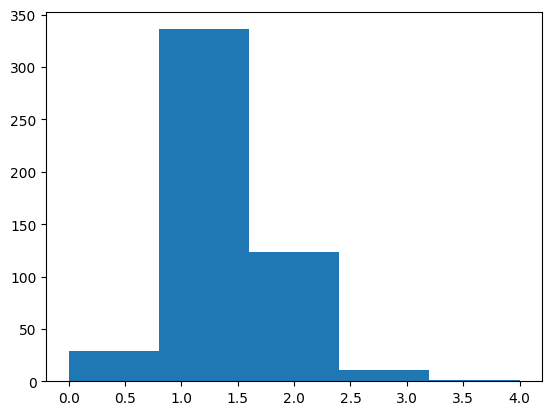

In [21]:
# Binning based on Income...

#min_val = data["Monthly Income"].min()
#max_val = data["Monthly Income"].max()

min_val = 0
max_val = 15000

import numpy as np
bins = np.linspace(min_val, max_val, 6)
display (bins)
labels = [0, 1, 2, 3, 4]

data["bins"] = pd.cut(data["Monthly Income"], bins = bins, labels = labels, include_lowest = True)
display(data)

# Graphical representation of the bins...
import matplotlib.pyplot as plt
plt.hist(data["bins"], bins = 5)